# Introductory applied machine learning (INFR10069) 

# Lab 3: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located within the `datasets` directory (adjacent to this file).

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
%matplotlib inline

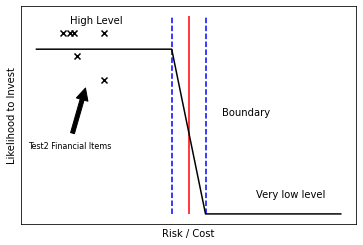

In [106]:
x = np.arange(0, 10)
y = [5]*5 + [0]*5

x2 = [0.8, 2, 1.1, 1, 1.2, 2]
y2 = [5+0.5, 25/7+0.5, 5+0.5, 5+0.5, 30/7+0.5, 5+0.5]

plt.plot(x, y, 'k-')
plt.scatter(x2, y2, marker='x', color='black')

plt.vlines(x=4.5, ymin=0, ymax=6, colors='red', linestyles='solid')
plt.vlines(x=4, ymin=0, ymax=6, colors='blue', linestyles='dashed')
plt.vlines(x=5, ymin=0, ymax=6, colors='blue', linestyles='dashed')
plt.text(1, 5.8, 'High Level', fontsize=10, color="black")
plt.text(6.5, 0.5, 'Very low level', fontsize=10, color="black")
plt.text(5.5, 3, 'Boundary', fontsize=10, color="black")
plt.annotate('Test2 Financial Items',
             xy=(1.5, 4),
             xytext=(1, 2),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=8,
            )

plt.xticks([])
plt.yticks([])
plt.xlabel('Risk / Cost')
plt.ylabel('Likelihood to Invest')
plt.show()

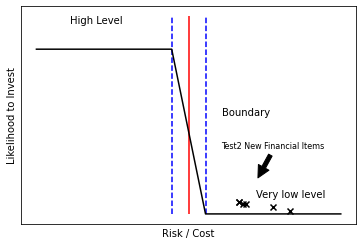

In [108]:
x = np.arange(0, 10)
y = [5]*5 + [0]*5

x2 = [6, 7, 6.1, 6, 6.2, 7.5]
y2 = [0.35, 0.2, 0.3, 0.35, 0.3, 0.1]

plt.plot(x, y, 'k-')
plt.scatter(x2, y2, marker='x', color='black')

plt.vlines(x=4.5, ymin=0, ymax=6, colors='red', linestyles='solid')
plt.vlines(x=4, ymin=0, ymax=6, colors='blue', linestyles='dashed')
plt.vlines(x=5, ymin=0, ymax=6, colors='blue', linestyles='dashed')
plt.text(1, 5.8, 'High Level', fontsize=10, color="black")
plt.text(6.5, 0.5, 'Very low level', fontsize=10, color="black")
plt.text(5.5, 3, 'Boundary', fontsize=10, color="black")
plt.annotate('Test2 New Financial Items',
             xy=(6.5, 1),
             xytext=(7, 2),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=8,
            )

plt.xticks([])
plt.yticks([])
plt.xlabel('Risk / Cost')
plt.ylabel('Likelihood to Invest')
plt.show()

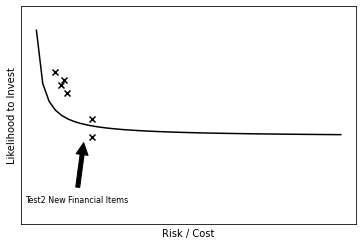

In [107]:
x1 = np.linspace(0, 10, 50)
y1 = 1 / (2*x1) + 2

x2 = [0.8, 2, 1.1, 1, 1.2, 2]
y2 = [3+0.5, 2, 3+0.3, 3+0.2, 3, 2+0.4]

plt.plot(x1, y1, 'k-', label='Possible Type 2')
plt.scatter(x2, y2, marker='x', color='black')
plt.ylim(0, 5)

plt.annotate('Test2 Financial Items',
             xy=(1.75, 2),
             xytext=(1.5, 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=8,
            )

plt.xticks([])
plt.yticks([])
plt.xlabel('Risk / Cost')
plt.ylabel('Likelihood to Invest')
plt.show()

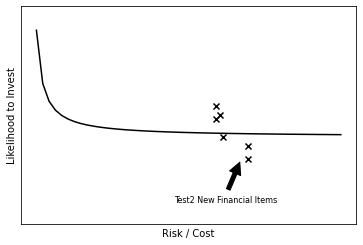

In [113]:
x1 = np.linspace(0, 10, 50)
y1 = 1 / (2*x1) + 2

x2 = [6, 7, 6.1, 6, 6.2, 7]
y2 = [2.4, 1.8, 2.5, 2.7, 2, 1.5]

plt.plot(x1, y1, 'k-', label='Possible Type 2')
plt.scatter(x2, y2, marker='x', color='black')
plt.ylim(0, 5)

plt.annotate('Test2 New Financial Items',
             xy=(6.8, 1.5),
             xytext=(6.3, 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=8,
            )

plt.xticks([])
plt.yticks([])
plt.xlabel('Risk / Cost')
plt.ylabel('Likelihood to Invest')
plt.show()

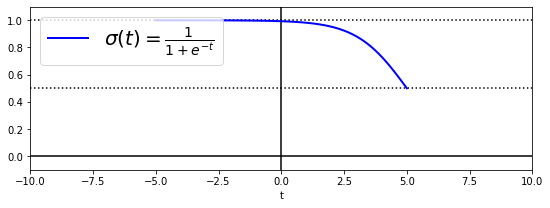

In [46]:
t = np.linspace(-5, 5, 100)
sig = 1 - (1 / (1 + np.exp(-t+5)))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$") #学习
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## 1. Spam filtering

### ========== Question 1.1 ==========
Load `spambase_binary.csv` into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [2]:
# Your Code goes here:
spambase = pd.read_csv('/Users/siyuyang/github/IAML-Lab-Exercises/datasets/spambase_binary.csv', delimiter = ',')
spambase.head(5)

,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [3]:
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   word_freq_make_binarized        4601 non-null   int64
 1   word_freq_address_binarized     4601 non-null   int64
 2   word_freq_all_binarized         4601 non-null   int64
 3   word_freq_3d_binarized          4601 non-null   int64
 4   word_freq_our_binarized         4601 non-null   int64
 5   word_freq_over_binarized        4601 non-null   int64
 6   word_freq_remove_binarized      4601 non-null   int64
 7   word_freq_internet_binarized    4601 non-null   int64
 8   word_freq_order_binarized       4601 non-null   int64
 9   word_freq_mail_binarized        4601 non-null   int64
 10  word_freq_receive_binarized     4601 non-null   int64
 11  word_freq_will_binarized        4601 non-null   int64
 12  word_freq_people_binarized      4601 non-null   int64
 13  wor

### ========== Question 1.2 ==========
We are going to use hold-out validation to evaluate our models below. Split the dataset into training and testing subsets using the `train_test_split` [function](http://scikit-learn.org/0.19/modules/generated/sklearn.cross_validation.train_test_split.html) we have used before. Call the resulting matrices `X_train`, `X_test`, `y_train`, `y_test`. Use 90% of the data for training and the remaining 10% for testing. Make sure you don't include the target variable `is_spam` in the input features (`X_train` / `X_test`)!

If you want to be able to reproduce your results exactly, what argument must you remember to set?

In [4]:
# Your Code goes here:
X = spambase.drop(['is_spam'], axis=1)
y = spambase['is_spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=1)

In [5]:
print(y_train.value_counts())
print(y_test.value_counts())

0    2516
1    1624
Name: is_spam, dtype: int64
0    272
1    189
Name: is_spam, dtype: int64


### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [6]:
# Your Code goes here:
lr = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9328502415458937
0.9392624728850325


***Your answer goes here:***

From the accuracy score that we get above, the classifier indeed generalises well on unseen data.

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_$_binarized`. Generally, we would expect the string `$` to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [7]:
# Your Code goes here:
coefficients = lr.coef_
coe = pd.DataFrame(data=coefficients, columns=X.columns)
print(coe.loc[0, 'word_freq_hp_binarized'], coe.loc[0, 'char_freq_$_binarized'])

-2.736142837133842 1.709948430098477


In [8]:
coefficients

array([[-0.34408205, -0.06045801, -0.34029007,  0.69877727,  1.01056593,
         0.23600526,  2.19857949,  0.77579044,  0.30770544,  0.34767542,
        -0.37749563, -0.29122597, -0.82969813,  0.59443562,  0.89007235,
         1.49564902,  0.89944899, -0.35519033,  0.15480443,  0.6552865 ,
         0.58126395,  1.00985661,  0.76384155,  1.44985761, -2.73614284,
        -0.48270894, -3.7390795 ,  1.63807846, -0.61961196, -0.04335219,
        -1.27123559, -0.74394736, -0.57373753,  0.57871863, -1.58787996,
         0.2677099 , -1.10363631,  0.97387124, -0.38193109, -0.28257636,
        -1.83221294, -2.04966323, -0.74234024, -1.25952983, -0.9110529 ,
        -1.98502859,  0.02117307, -1.49030392, -0.16099955,  0.19108202,
        -0.06379929,  1.30657283,  1.70994843, -0.30512498]])

***Your answer goes here:***

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [13]:
# Your Code goes here:
lsvc = LinearSVC().fit(X_train, y_train)

In [14]:
print(lsvc.score(X_train, y_train))
print(lsvc.score(X_test, y_test))

0.9323671497584541
0.9370932754880694


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [10]:
# Your Code goes here:
coefficients2 = lsvc.coef_
coe2 = pd.DataFrame(data=coefficients2, columns=X.columns)
print(coe2.loc[0, 'word_freq_hp_binarized'], coe2.loc[0, 'char_freq_$_binarized'])

-0.9103325550944324 0.5803286046554218


In [14]:
lsvc.intercept_

array([-0.68015782])

***Your answer goes here:***

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

```Logistics Regression: ```
- Hypothesis function for the logistics regression:
$$ P(Y=1|\mathbf{x}) = \frac {1}{1+\text{exp}(-\mathbf{w}^T\mathbf{x})} $$
or
$$ P(Y=1|\mathbf{x}) = \frac {1}{1+\text{exp}(-\mathbf{z})} $$
if $ P > 0.5 $, then the instance should be classfied to $Y = 1$; otherwise, $Y = 0$; if $ \mathbf{z} > 0 $, then the instance should be classfied to $Y = 1$; otherwise, $Y = 0$.
- Logistics regression is a linear classifier based on its decision boundary. Its decision boundary is $\mathbf{w}^T\mathbf{x} + w_0$.

```SVM: ```
- Hypothesis function for SVM:    
$$ h(\mathbf{x}) = \text{sign}(\mathbf{w^Tx} + w_0) $$
if $h(\mathbf{x}) > 1$, then $y_i = 1$; if $h(\mathbf{x}) < -1$,, $y_i = -1$.
- The decision boundary of a SVM model is $\mathbf{w}^T\mathbf{x} + w_0$ as well.

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [11]:
# Your Code goes here:
rbf = SVC(kernel='rbf').fit(X_train, y_train)
print(rbf.score(X_train, y_train))
print(rbf.score(X_test, y_test))

0.9557971014492753
0.9566160520607375


In [12]:
poly = SVC(kernel='poly').fit(X_train, y_train)
print(poly.score(X_train, y_train))
print(poly.score(X_test, y_test))

0.946376811594203
0.9262472885032538


***Your answer goes here:***

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. For more information, you can read the dataset description in the link. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [13]:
# Load Splice Train Here
# Your Code goes here:
splice_train = pd.read_csv('/Users/siyuyang/github/IAML-Lab-Exercises/datasets/splice_train.csv', delimiter=',')
print(splice_train.shape)
splice_train.head(10)

(2935, 61)


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N
5,A,T,A,C,C,T,G,C,C,C,...,A,T,G,G,G,G,T,C,T,EI
6,T,T,C,T,C,C,A,T,T,T,...,G,A,T,A,T,C,C,A,T,IE
7,A,A,A,G,A,T,G,A,T,A,...,A,A,G,C,C,C,T,T,C,EI
8,C,C,A,A,T,C,C,C,A,G,...,G,G,C,G,G,C,C,T,G,N
9,G,C,C,G,T,G,G,T,T,T,...,A,A,G,G,C,T,C,C,T,EI


In [14]:
splice_test = pd.read_csv('/Users/siyuyang/github/IAML-Lab-Exercises/datasets/splice_test.csv', delimiter=',')
print(splice_test.shape)
splice_test.head(10)

(255, 61)


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,IE
5,C,T,T,G,T,T,A,C,A,G,...,C,C,G,A,G,A,A,C,C,N
6,C,G,T,C,A,A,T,C,A,A,...,A,A,A,A,T,T,A,A,G,EI
7,G,T,C,C,G,T,G,C,C,T,...,G,C,C,C,T,T,T,G,C,N
8,A,T,A,C,C,T,G,T,A,G,...,C,G,T,T,T,A,T,A,T,N
9,G,G,T,G,G,G,C,C,A,A,...,C,A,G,G,C,A,T,G,G,N


### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`get_dummies(...)`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.get_dummies.html) function from pandas. Make sure to take care of the values `D`, `N`, `S`, `R` (see the [documentation](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) for the data). *Hint: checkout the pandas [`CategoricalDtype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html#pandas.api.types.CategoricalDtype)*. Also, make sure to not transform the target variable (`class`).

In [23]:
splice = pd.concat([splice_train, splice_test], ignore_index=True)
splice_dummies = pd.get_dummies(splice.drop(['class'], axis=1))

In [15]:
cdt = pd.CategoricalDtype(categories=['A', 'C', 'G', 'T', 'D', 'N', 'S', 'R'], ordered=True)
X_train = pd.get_dummies(splice_train.loc[:, 'pos0':'pos59'].astype(cdt))
X_test = pd.get_dummies(splice_test.loc[:, 'pos0':'pos59'].astype(cdt))

### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [16]:
# Your Code goes here:
y_train = splice_train['class']
y_test = splice_test['class']

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2935, 480)
(2935,)
(255, 480)
(255,)


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbours Classification](http://scikit-learn.org/0.19/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbour. Report the classification accuracy on the training set.

In [18]:
# Your Code goes here:
knc = KNeighborsClassifier().fit(X_train, y_train)
print(knc.score(X_train, y_train))

0.8633730834752982


### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

***Your answer goes here:***

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [44]:
# Your Code goes here:
print(knc.score(X_test, y_test))

0.7843137254901961


### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas' built-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.value_counts.html).* 

<AxesSubplot:>

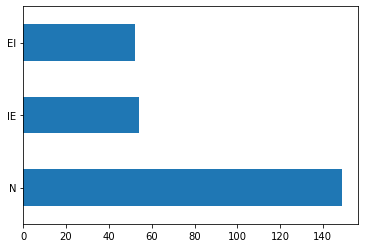

In [45]:
# Your Code goes here:
y_test.value_counts().plot(kind = 'barh')

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`? 

**Pro Tip** - You should always use a ['Dummy Model'](http://scikit-learn.org/0.19/modules/model_evaluation.html#dummy-estimators) (a ridiculously simple model) like this to compare with your 'real' models. It's very common for complex models to be outperformed by a simple model, such as predicting the most common class. When complex models are outperformed by 'Dummies', you should investigate why: often there was an issue with the code, the data, or the way the model works was misunderstood.

In [46]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='constant',constant='N').fit(X_train, y_train)
print(dc.score(X_train, y_train))
print(dc.score(X_test, y_test))

0.5131175468483816
0.5843137254901961


### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the dumb prediction accuracy.*

In [49]:
# Your Code goes here:
accuracy = []
for k in [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]:
    knc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    accuracy_test = knc.score(X_test, y_test)
    print('When k='+str(k)+', the accuracy is: '+str(accuracy_test))
    accuracy.append(accuracy_test)

When k=5, the accuracy is: 0.7843137254901961
When k=10, the accuracy is: 0.8156862745098039
When k=50, the accuracy is: 0.8666666666666667
When k=100, the accuracy is: 0.8901960784313725
When k=200, the accuracy is: 0.8862745098039215
When k=500, the accuracy is: 0.9411764705882353
When k=1000, the accuracy is: 0.9568627450980393
When k=1500, the accuracy is: 0.6980392156862745
When k=2000, the accuracy is: 0.5843137254901961


### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

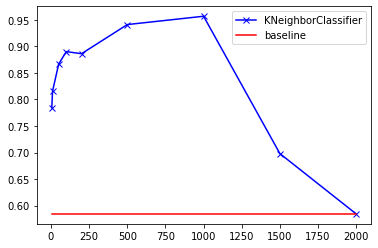

In [57]:
# Your Code goes here:
fig, axes = plt.subplots()
k = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
axes.plot(k, accuracy, 'b-', label='KNeighborClassifier', marker='x')
axes.plot(k, [dc.score(X_test, y_test)]*9, 'r-', label='baseline')
plt.legend()
plt.show()

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set (you may use the provided function). Then plot the confusion matrix for a 5-nearest neighbour classifier. What do you observe?

In [62]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')

[[0.88461538 0.         0.11538462]
 [0.03703704 0.92592593 0.03703704]
 [0.         0.00671141 0.99328859]]


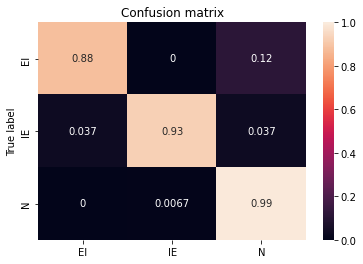

In [70]:
# Your Code goes here:
knc_1000 = KNeighborsClassifier(n_neighbors=1000).fit(X_train, y_train)
y_test_pred = knc_1000.predict(X_test)
cm1 = confusion_matrix(y_test, y_test_pred, normalize='true', labels=['EI', 'IE', 'N'])
print(cm1)
plot_confusion_matrix(cm1, classes=['EI', 'IE', 'N'])

[[0.98076923 0.01923077 0.        ]
 [0.05555556 0.88888889 0.05555556]
 [0.18120805 0.1409396  0.67785235]]


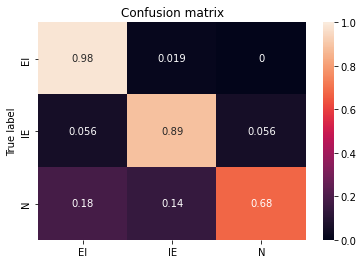

In [71]:
knc_5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_test_pred = knc_5.predict(X_test)
cm2 = confusion_matrix(y_test, y_test_pred, normalize='true', labels=['EI', 'IE', 'N'])
print(cm2)
plot_confusion_matrix(cm2, classes=['EI', 'IE', 'N'])

***Your answer goes here:***

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/0.19/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss). It is often the error metric used when we are trying to optimise classification models.

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence with which these labels are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts that the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss` metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was the error metric? Comment on why this might happen, and which metric would be a better evaluator of performance.

In [75]:
# Your Code goes here:
logloss = []
for k in [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]:
    knc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_test_pred = knc.predict_proba(X_test)
    logloss_test = log_loss(y_test, y_test_pred)
    print('When k='+str(k)+', the log loss is: '+str(logloss_test))
    logloss.append(logloss_test)

When k=5, the log loss is: 1.4909193996046313
When k=10, the log loss is: 0.489381019844735
When k=50, the log loss is: 0.5327181300756093
When k=100, the log loss is: 0.5583129505381812
When k=200, the log loss is: 0.6019532892756086
When k=500, the log loss is: 0.6715866647110698
When k=1000, the log loss is: 0.7542935541745395
When k=1500, the log loss is: 0.8177287055931994
When k=2000, the log loss is: 0.8753647883393483


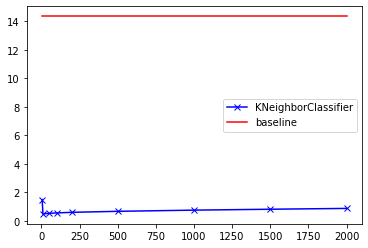

In [77]:
# Your Code goes here:
baseline_proba = np.array([[0, 0, 1]]*y_test.shape[0])
fig, axes = plt.subplots()
k = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
axes.plot(k, logloss, 'b-', label='KNeighborClassifier', marker='x')
axes.plot(k, [log_loss(y_test, baseline_proba)]*9, 'r-', label='baseline')
plt.legend()
plt.show()

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

***Your answer goes here:***

No. This is simply because the prediction of SVM classifier is not rely on the probabilities. It will not generate probabilities when making predictions.